In [95]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
from sklearn.linear_model import LinearRegression
import json
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn import metrics
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [96]:
"""
Loading of the dataset provided
Edit the code below
"""
df = pd.read_json("../input/milling-dataset/ipt_12.json")
df = df.drop(labels=[17], axis=0)
df.reset_index()

,index,case,run,VB,DOC,time,material,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,0,1,1,0.00,1.5,2,1,0.5,"[-0.0170898438, 0.263671875, 0.2075195312, 0.3...","[0.625, 0.810546875, 0.7812500000000001, 0.849...","[0.078125, 0.0854492188, 0.078125, 0.073242187...","[0.3149414062, 0.3015136719, 0.3039550781, 0.3...","[0.0872802734, 0.0982666016, 0.0921630859, 0.0...","[0.1037597656, 0.1232910156, 0.1049804688, 0.1..."
1,1,1,2,NaN,1.5,4,1,0.5,"[0.3076171875, 0.3125, 0.1953125, 0.1879882812...","[0.6689453125, 0.6787109375, 0.859375, 1.12304...","[0.0756835938, 0.08056640620000001, 0.078125, ...","[0.3015136719, 0.3088378906, 0.2990722656, 0.3...","[0.0866699219, 0.0897216797, 0.0946044922, 0.1...","[0.0994873047, 0.1037597656, 0.1080322266, 0.1..."
2,2,1,3,NaN,1.5,6,1,0.5,"[-0.7250976562, -0.7153320312, -0.5297851562, ...","[0.9130859375, 0.8349609375, 0.908203125000000...","[0.0830078125, 0.078125, 0.09033203120000001, ...","[0.2954101562, 0.2966308594, 0.29296875, 0.290...","[0.0927734375, 0.1007080078, 0.0933837891, 0.0...","[0.1049804688, 0.1190185547, 0.109863281200000..."
3,3,1,4,0.11,1.5,7,1,0.5,"[0.1123046875, 0.009765625, -0.1513671875, -0....","[0.1318359375, 0.3955078125, 0.7568359375, 0.8...","[0.0830078125, 0.0756835938, 0.0659179688, 0.0...","[0.3161621094, 0.3112792969, 0.302734375, 0.32...","[0.1129150391, 0.0994873047, 0.1049804688, 0.1...","[0.1397705078, 0.12145996090000001, 0.12451171..."
4,4,1,5,NaN,1.5,11,1,0.5,"[-0.1220703125, -0.1635742188, -0.3686523438, ...","[0.44921875, 0.6640625, 0.6689453125, 0.747070...","[0.107421875, 0.107421875, 0.1025390625, 0.100...","[0.2844238281, 0.2893066406, 0.2844238281, 0.2...","[0.0958251953, 0.09765625, 0.09765625, 0.09460...","[0.1104736328, 0.1135253906, 0.109863281200000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,16,2,NaN,1.5,2,2,0.5,"[-0.5834960938, -0.5810546875, -0.5151367188, ...","[1.30859375, 1.318359375, 1.3330078125, 1.3427...","[0.0634765625, 0.0732421875, 0.0659179688, 0.0...","[0.3308105469, 0.2990722656, 0.3173828125, 0.3...","[0.0939941406, 0.0897216797, 0.0982666016, 0.0...","[0.1092529297, 0.1025390625, 0.116577148400000..."
162,163,16,3,0.24,1.5,3,2,0.5,"[-0.2001953125, -0.009765625, 0.0830078125, 0....","[1.40625, 1.4013671875, 1.396484375, 1.3867187...","[0.0659179688, 0.0708007812, 0.0634765625, 0.0...","[0.2795410156, 0.2844238281, 0.3015136719, 0.2...","[0.1147460938, 0.0952148438, 0.1019287109, 0.0...","[0.1397705078, 0.1123046875, 0.1202392578, 0.1..."
163,164,16,4,NaN,1.5,4,2,0.5,"[0.24414062500000003, 0.24414062500000003, 0.2...","[1.328125, 1.3330078125, 1.3330078125, 1.33300...","[0.0634765625, 0.05859375, 0.05859375, 0.06347...","[0.2905273438, 0.2795410156, 0.2856445312, 0.2...","[0.1013183594, 0.12145996090000001, 0.12207031...","[0.1177978516, 0.1403808594, 0.1428222656, 0.1..."
164,165,16,5,0.40,1.5,6,2,0.5,"[-0.205078125, -0.2392578125, -0.15625, 0.1269...","[1.3818359375, 1.38671875, 1.38671875, 1.38183...","[0.068359375, 0.05859375, 0.0708007812, 0.0659...","[0.2893066406, 0.3002929688, 0.2917480469, 0.3...","[0.0988769531, 0.0964355469, 0.0897216797, 0.0...","[0.1147460938, 0.1123046875, 0.106811523400000..."


In [97]:
"""
A standard nan removal to be added.
Add more preprocessing steps if needed.
"""
target = df['VB'].fillna(df['VB'].mean())
df = df[df.columns.drop("VB")]
print(df.shape)

(166, 12)


In [98]:
df1=df.drop(["smcDC","vib_table","vib_spindle","AE_table","AE_spindle"],axis=1)
df1=df1.explode("smcAC")    
df2=df.drop(['case', 'run',   'DOC', 'time', 'material', 'feed', 'smcAC',
        'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle'],axis=1)
df2=df2.explode("smcDC")
df3=df.drop(['case', 'run',   'DOC', 'time', 'material', 'feed', 'smcAC',
       'smcDC', 'vib_spindle', 'AE_table', 'AE_spindle'],axis=1)
df3=df3.explode("vib_table")
df4=df.drop(['case', 'run',   'DOC', 'time', 'material', 'feed', 'smcAC',
       'smcDC', 'vib_table',  'AE_table', 'AE_spindle'],axis=1)
df4=df4.explode("vib_spindle")
df5=df.drop(['case', 'run',   'DOC', 'time', 'material', 'feed', 'smcAC',
       'smcDC', 'vib_table', 'vib_spindle', 'AE_spindle'],axis=1)
df5=df5.explode("AE_table")
df6=df.drop(['case', 'run',   'DOC', 'time', 'material', 'feed', 'smcAC',
       'smcDC', 'vib_table', 'vib_spindle', 'AE_table',],axis=1)
df6=df6.explode("AE_spindle")

df1['smcDC']=df2['smcDC']
df1['vib_table']=df3['vib_table']
df1['vib_spindle']=df4['vib_spindle']
df1['AE_table']=df5['AE_table']
df1['AE_spindle']=df6['AE_spindle']

In [99]:
a, c = df.shape
l=np.zeros((a, 9000, c))
for i in range(a):
    block = (9000*i)
    for j in range(9000):
        ser = df1.iloc[block+j]
        l1 = ser.to_numpy(dtype=np.float32)
        l[i][j] = l1

In [100]:
print(l[1,0])
print(l[0])
print(l.shape)

[1.         2.         1.5        4.         1.         0.5
 0.30761719 0.66894531 0.07568359 0.30151367 0.08666992 0.0994873 ]
[[1.         1.         1.5        ... 0.31494141 0.08728027 0.10375977]
 [1.         1.         1.5        ... 0.30151367 0.0982666  0.12329102]
 [1.         1.         1.5        ... 0.30395508 0.09216309 0.10498047]
 ...
 [1.         1.         1.5        ... 0.3125     0.10131836 0.10681152]
 [1.         1.         1.5        ... 0.31738281 0.12756348 0.11230469]
 [1.         1.         1.5        ... 0.3112793  0.12329102 0.13427734]]
(166, 9000, 12)


In [101]:
y = target.to_numpy()
print(y)

[0.         0.33937931 0.33937931 0.11       0.33937931 0.2
 0.24       0.29       0.28       0.29       0.38       0.4
 0.43       0.45       0.5        0.33937931 0.44       0.14
 0.14       0.14       0.15       0.33937931 0.18       0.22
 0.26       0.31       0.38       0.43       0.48       0.55
 0.         0.13       0.13       0.17       0.19       0.2
 0.23       0.23       0.26       0.28       0.33       0.36
 0.44       0.55       0.08       0.13       0.2        0.31
 0.35       0.4        0.49       0.         0.1        0.14
 0.19       0.27       0.38       0.47       0.64       0.81
 0.         0.04       0.08       0.16       0.25       0.36
 0.43       0.47       0.53       0.7        0.         0.04
 0.07       0.07       0.08       0.09       0.33937931 0.12
 0.16       0.18       0.2        0.23       0.26       0.33937931
 0.31       0.37       0.33937931 0.42       0.47       0.57
 0.65       0.68       0.76       0.33937931 0.05       0.08
 0.33937931 0.12     

In [102]:
def split_train_test(X, y):
    """
    Splitting the data into train, test, validation 
    """
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [103]:
def plotting(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.figure(figsize=(10,10))
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('mean_squared_error')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(10,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('mean squared error loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [104]:
def timeseries_transform(data, head_size, num_heads, ff_dim, dropout=0):
    """
    Implement the timeseries transformer here
    """
    # Normalization and Attention
    x = data
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)


    res = x + data
    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=data.shape[-1], kernel_size=1)(x)
    
    return x + res

In [105]:
#  res = x + data
#     # Feed Forward Part
#     x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
#     x = layers.MaxPooling1D(pool_size=1)(x)
#     x = layers.LayerNormalization(epsilon=1e-6)(x)
#     x = layers.Conv1D(filters=data.shape[-1], kernel_size=1)(x)
#     return x + res

In [118]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = layers.Conv1D(filters=1, kernel_size=1, activation="relu")(x)

    for _ in range(num_transformer_blocks):
        x = timeseries_transform(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [135]:
def model_training(X_train, y_train, X_val, y_val):
    """
    Train the data with the compatible model
    """
    
    input_shape = (9000, 12)
    
    # instantiating the model in the strategy scope creates the model on the TPU
    with tpu_strategy.scope():

        model = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], mlp_dropout=0.4, dropout=0.0)
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, decay_steps=10000, decay_rate=0.9)

        model.compile(
            loss="mse",
            optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
            metrics=[tensorflow.keras.metrics.MeanSquaredError()],
        )

        model.summary()

        callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

        history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=200, batch_size=16, callbacks=callbacks)
    
    plotting(history)
    
    return model

In [136]:
def metric(y_act, y_pred):
    """
    Standard metrics and plotting should be same
    Metrics should be computed on validation data(unseen data)
    1. Balanced accuracy score
    2. Confusion matrix
    3. Per-class accuracy
    """
    
    mse = metrics.mean_squared_error(y_act, y_pred)
    
    return mse

In [137]:
def evaluate(X_test, y_act, metric, model):
    y_pred = model.predict(X_test, verbose=1)
    mse = metric(y_act, y_pred)
    
    return y_pred, mse

2022-05-26 22:23:55.530986: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-05-26 22:23:55.531256: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30042}
2022-05-26 22:23:55.534781: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-05-26 22:23:55.534829: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30042}


Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 9000, 12)]   0                                            
__________________________________________________________________________________________________
conv1d_187 (Conv1D)             (None, 9000, 1)      13          input_18[0][0]                   
__________________________________________________________________________________________________
multi_head_attention_85 (MultiH (None, 9000, 1)      7169        conv1d_187[0][0]                 
                                                                 conv1d_187[0][0]                 
__________________________________________________________________________________________________
layer_normalization_202 (LayerN (None, 9000, 1)      2           multi_head_attention_85[0]

2022-05-26 22:24:47.473599: W ./tensorflow/core/distributed_runtime/eager/destroy_tensor_handle_node.h:57] Ignoring an error encountered when deleting remote tensors handles: Invalid argument: Unable to find the relevant tensor remote_handle: Op ID: 367625, Output num: 1
Additional GRPC error information from remote target /job:worker/replica:0/task:0:
:{"created":"@1653603887.473491169","description":"Error received from peer ipv4:10.0.0.2:8470","file":"external/com_github_grpc_grpc/src/core/lib/surface/call.cc","file_line":1056,"grpc_message":"Unable to find the relevant tensor remote_handle: Op ID: 367625, Output num: 1","grpc_status":3}


7/7 [==============================] - 5s 759ms/step - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 8/200
7/7 [==============================] - 3s 488ms/step - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 9/200
7/7 [==============================] - 3s 487ms/step - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 10/200
7/7 [==============================] - 3s 488ms/step - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 11/200
7/7 [==============================] - 3s 494ms/step - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 12/200
7/7 [==============================] - 3s 487ms/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 13/200
7/7 [=========================

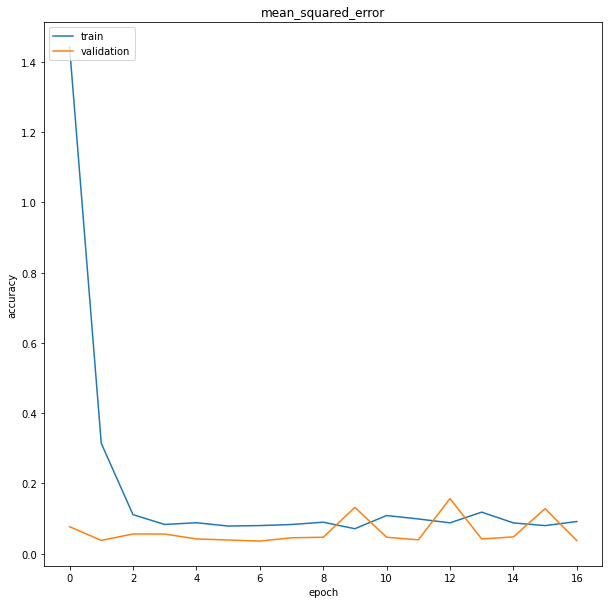

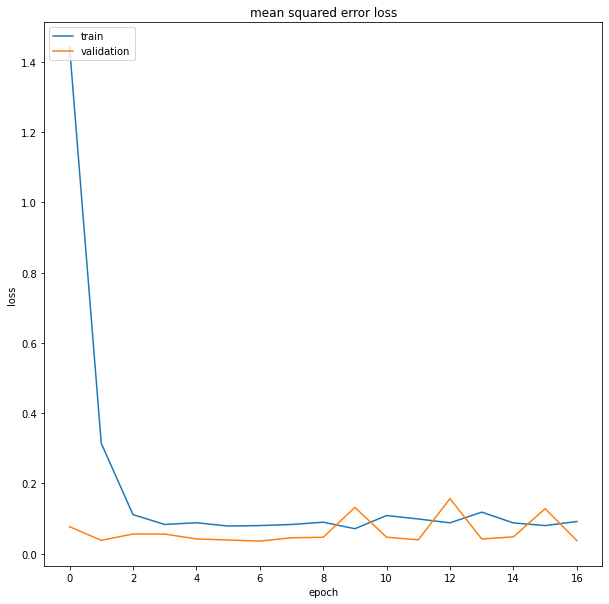

In [138]:
X_train, X_val, X_test, y_train, y_val, y_test = split_train_test(l, y)

# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

model_self=model_training(X_train, y_train, X_val, y_val)

In [139]:
y_pred, mse = evaluate(X_test, y_test, metric, model_self)
print(mse)

1/1 [==============================] - 4s 4s/step
0.3566181821116012


In [140]:
y_pred  = np.reshape(y_pred, y_test.shape[0])
#indx = y_test.index.values
#y_test_arr = y_test.to_numpy()
results = pd.DataFrame(list(zip(y_test, y_pred)), columns =['y_test', 'y_pred'])
results

,y_test,y_pred
0,0.310000,0.277119
1,0.290000,-1.172728
2,0.430000,0.277119
3,0.440000,0.281095
4,0.120000,0.277119
5,0.339379,0.277119
6,0.680000,0.277119
7,0.580000,0.277119
8,0.080000,0.277119
9,0.360000,0.277119


In [ ]:
results['index'] = results.index.values
results.plot.scatter(x ='y_test', y='index')
results.plot.scatter(x='y_pred',y='index',c='red')

In [ ]:
y_test